## **** ||  Binary Classification -  Logistic Regression || ****

## Classification:

Classification is the process of categorizing the given set of data into different classes.It is about predicting the qualitative output. It can only take values from a finite set due to the qualitative output. It basically predicts the category 
that the data belong to.

For eg : Spam filters which determines whether the email is spam or not spam ,  predicting the breed of the dog , etc.

Classification comes under   $supervised$ $learning$.


There are different types of classification and one of the type is $Binary$ $classification$.
 

## Supervised Learning:

Supervised  Learning is a machine learning task where an algorithm is trained to find the pattern

It is the task of learning a function that maps an input to an output based on example of input-output pairs. 

## Binary Classification

It is a type of classification with two outcomes.

It is the  process of classifying an example into a set of two classes using a $classifier$.


## Logistic Regression

In logistic regression outcome is measured with a dichotomous variable , which means it will have only two possible outcomes.

In binary logistic regression the target variables must be binary and the desired outcome is represented by 0 or 1.

It is useful to understand how a set of independent varaible affect the outcome of dependent variable.

Here the predicted value is categorical.

It is a special case of $linear$ $regression$ . The difference is instead of fitting  a line to the data , logistic regression fits a 
'S' shaped "$logistic$ $function$" which is also called as "$Sigmoid$ $Function$".


   Sigmoid function  
    
  $  f(x) = \frac {1}{1 + e^-1} $
  
  
  * It can take any real valued number and map it into value between 0 and 1. 
  * If the curve goes positive infinity , prediction will become 1.
  * if the curve goes negative infinity the prediction will become 0.
  * If the output of the sigmoid function is  more than 0.5 we classify it as 1 and when the sigmoid funtion is less than 0.5 ,     we classify it as 0.
  * Logistic function takes an input and returns an output of probability , which is a value between 0 and  1 ,
    and it is done with the help of logistic function(sigmoid function)
  

* Sigmoid function is responsible for predicting or classifying a given output.

In [1]:
def sigmoid(X, weight):                                                   #code in python for sigmoid functon
    z = np.dot(X, weight)                                         
    return 1 / (1 + np.exp(-z))

* Now there are two ways to approach optimization of logistic regression 
  * Loss minimization with the use of $gradient$ $descent$ and another way is with $maximum$ $liklihood$ $estimation$
  
     * To find the best values for weight , we start by picking random values and to measure how well the algorithm 
       performs with those random weights we use $Loss$ $Function$
  Find the sum across all the values in training data. 
  $$ L = \sum_{i = 1}^n(y_i - \bar{y_i})^2 $$  
    $$ y_i  = actual value $$ 
    $$  \bar{y_i}  = predicted value  $$

In [2]:
def loss(h, y):                                                                 #code in python for loss function
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

 * To minimise the loss by increasing or decreasing weights(fitting). which weight is bigger and which is smaller is decided by 
   the function $gradient$ $descent$
 * Gradient descent is an optimization algorithm used to minimise some function by teratively moving in the direction of     steepest descent as defined by the negative of the gradient
 

 * Maximum likelihood estimation - In Maximum likelihood estimation we maximise the likelihood with $gradient$ $ascent$.
 * Gradient ascent is same as gradient descent the difference is gradient ascent's goal is to maximise a function rather than minimising it.

In [3]:
def gradient_descent(X, h, y):                                 #gradient descent python code
    return np.dot(X.T, (h - y)) / y.shape[0]                                           
def update_weight_loss(weight, learning_rate, gradient):          #updating the weight          
    return weight - learning_rate * gradient

### Below is the example of logistic regression  from scratch

In [4]:
import numpy as np
import pandas as pd                                         #importing all the necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from math import exp

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")                  #reading the dataset

In [6]:
# Here using this dataset we have to predict whether the person will buy a car or not. 
# The following dataset can be downloaded from kaggle.com

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


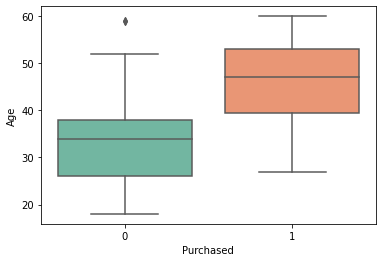

In [8]:
sns.boxplot(x="Purchased", y="Age", data=df, palette='Set2' )
plt.show()

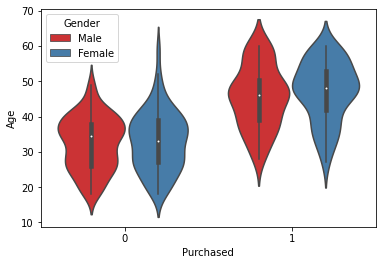

In [9]:
sns.violinplot(x="Purchased", y="Age",hue="Gender", data=df, palette='Set1')
plt.show()

In [10]:
df.drop(columns=['User ID'],inplace=True)

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [13]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [15]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [16]:
df.dtypes

Gender             int32
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

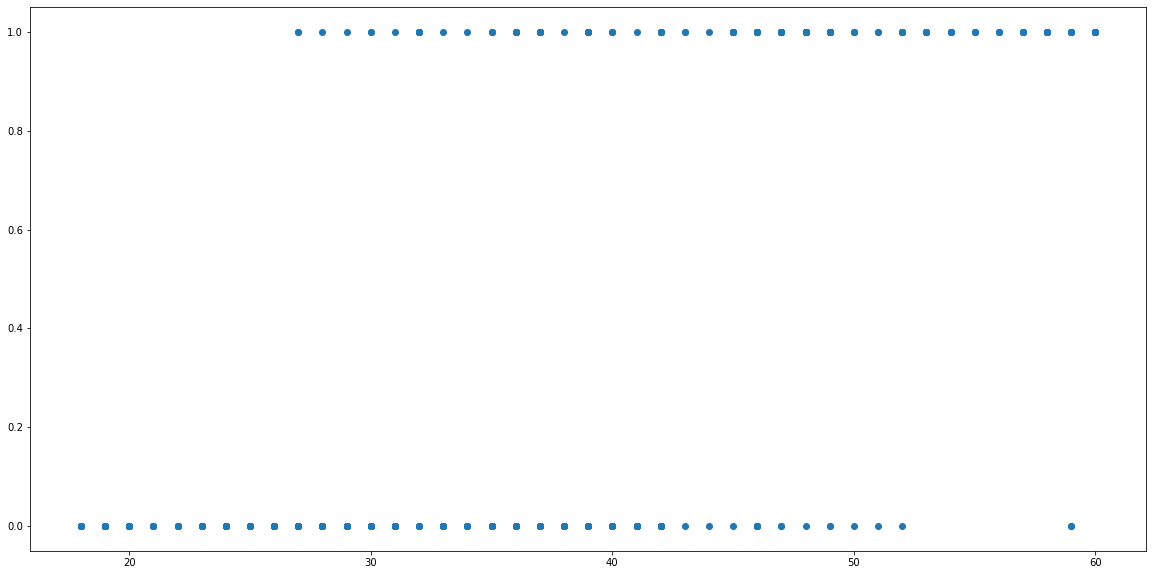

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(df['Age'], df['Purchased'])
plt.show()

In [18]:
#training the dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['Age'], df['Purchased'], test_size=0.20)

In [20]:
def normalize(X):
    return X - X.mean()                             #normalising the data

In [21]:
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])                      #making the prediction

In [22]:
def logistic_regression(X, Y):                                       # method for traing the model
    X = normalize(X)
    b0 = 0
    b1 = 0                                         #initialising the varaibles
    L = 0.001
    epochs = 300
    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))               # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))           # Derivative of loss wrt b1
        b0 = b0 - L * D_b0   
        b1 = b1 - L * D_b1
    
    return b0, b1  


In [23]:
b0, b1 = logistic_regression(X_train, y_train)                                          #training the model

In [24]:
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)                                                  #making prediction
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]                      

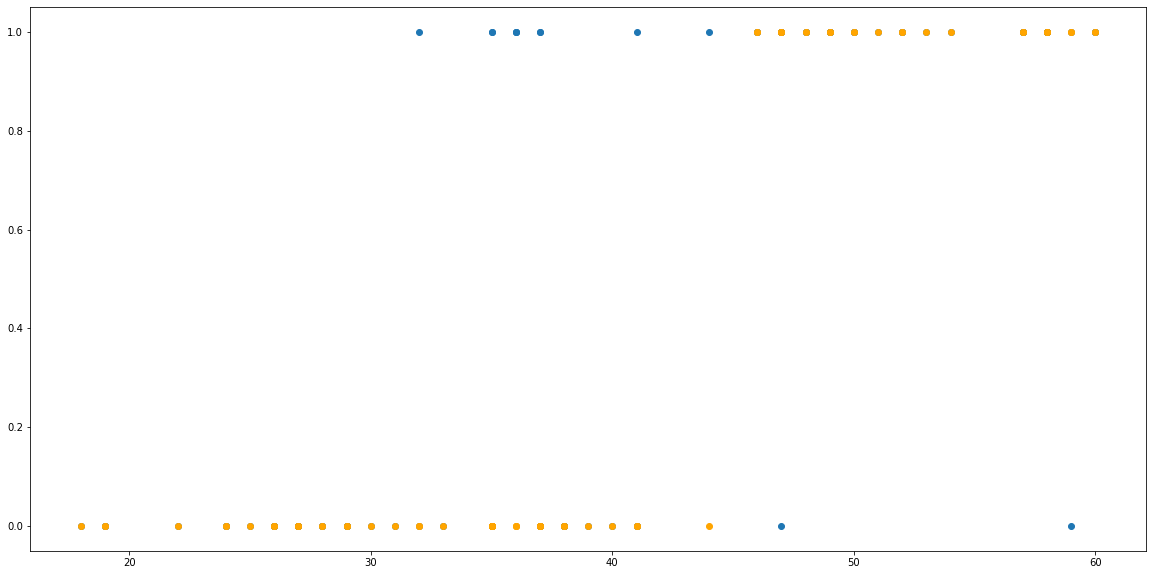

In [25]:
plt.figure(figsize=(20,10))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="orange")
plt.show()

In [26]:
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

Accuracy = 0.85


### Prediction using sklearn

In [27]:
lg = LogisticRegression()                                     #training logistic regression

In [28]:
lg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))


H:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [29]:
prediction = lg.predict(X_test.values.reshape(-1,1))                                        #model evaluation

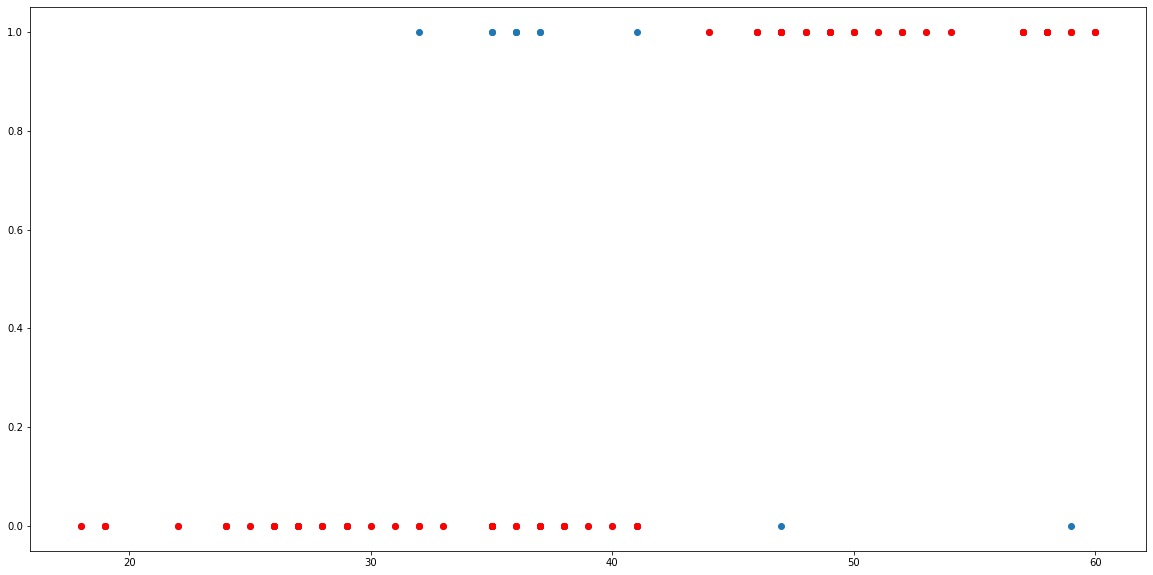

In [30]:
plt.figure(figsize=(20,10))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, prediction, c="red")
plt.show()

In [31]:
print(f"Accuracy = {lg.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

Accuracy = 0.8625


In [32]:
from sklearn.metrics import confusion_matrix                           #confusion matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[41,  2],
       [ 9, 28]], dtype=int64)

In [33]:
rm =(((cm.T)/(cm.sum(axis=1))).T) #Recall
rm

array([[0.95348837, 0.04651163],
       [0.24324324, 0.75675676]])

In [34]:
from sklearn.metrics import recall_score
rec = recall_score(y_test,prediction, average = 'micro')             #recall matrix
rec

0.8625

In [35]:
pm =(cm/cm.sum(axis=0)) #Precision 
pm

array([[0.82      , 0.06666667],
       [0.18      , 0.93333333]])

In [36]:
from sklearn.metrics import precision_score                             #precision matrix
prec = precision_score(y_test,prediction, average = 'micro')
prec

0.8625

In [37]:
F1 = 2*pm*rm/(pm+rm)                                                  #f1 score

In [38]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,prediction, average = 'micro')
f1

0.8625

$The$ $model$ $accomplished$ 86.25% $accuracy$

## References :
    
[link1](https://machinelearningmastery.com/types-of-classification-in-machine-learning/)
[link2](https://towardsdatascience.com/logistic-regression-explained-and-implemented-in-python-880955306060)
[link3](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)
[link4](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
    
